In [2]:
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2
from matplotlib import pyplot as plt

In [8]:
# import argparse
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,help="path to input image")
# ap.add_argument("-r", "--reference", required=True,help="path to reference OCR-A image")
# args = vars(ap.parse_args())
# args

In [31]:
ref = cv2.imread('/home/leij/Desktop/template-matching-ocr/ocr_a_reference.png')

In [32]:
ref = cv2.cvtColor(ref,cv2.COLOR_BGR2GRAY)

In [33]:
ref = cv2.threshold(ref, 10, 255, cv2.THRESH_BINARY_INV)[1]

In [6]:
cv2.imshow('s',ref)
cv2.waitKey(0)

100

In [11]:
x = [i for i in range(10)]

In [58]:
output = []

In [34]:
refCnts = cv2.findContours(ref.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
refCnts = refCnts[0] if imutils.is_cv2() else refCnts[1]
refCnts = contours.sort_contours(refCnts, method="left-to-right")[0]

In [35]:
digits = {}
# loop over the OCR-A reference contours
for (i, c) in enumerate(refCnts):
	# compute the bounding box for the digit, extract it, and resize
    # it to a fixed size
    (x, y, w, h) = cv2.boundingRect(c)
    print(i,x,y,w,h)
    roi = ref[y:y + h, x:x + w]
    roi = cv2.resize(roi, (57, 88))
 
	# update the digits dictionary, mapping the digit name to the ROI
    digits[i] = roi

0 15 20 53 85
1 94 20 53 85
2 174 20 53 85
3 253 20 53 85
4 338 20 48 85
5 412 20 53 85
6 492 20 53 85
7 571 20 53 85
8 651 20 53 85
9 730 20 54 85


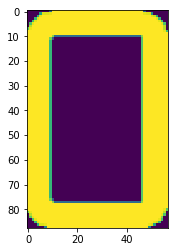

In [29]:
plt.imshow(digits[0])

In [4]:
# initialize a rectangular (wider than it is tall) and square
# structuring kernel
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))
sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

In [33]:
sqKernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [5]:
original_image = cv2.imread('/home/leij/Desktop/template-matching-ocr/images/credit_card_05.png')
image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
image = imutils.resize(image,width=300)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)

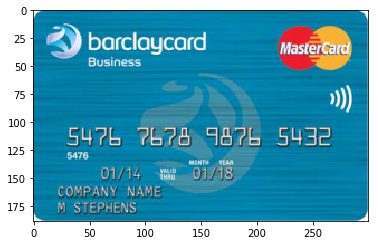

In [28]:
plt.imshow(image)

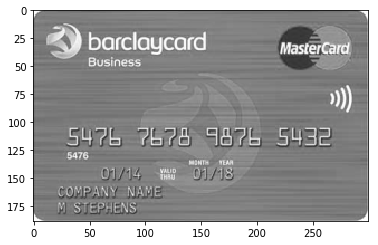

In [6]:
plt.imshow(gray)

In [7]:
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))
sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel)

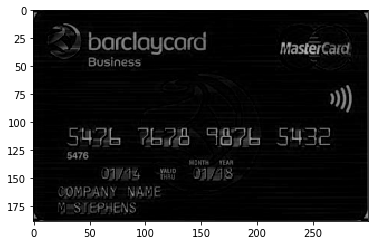

In [33]:
plt.imshow(tophat)

In [8]:
gradX = cv2.Sobel(tophat, ddepth=cv2.CV_32F, dx=1, dy=0,
	ksize=-1)

In [9]:
gradX = np.absolute(gradX)

In [10]:
(minVal, maxVal) = (np.min(gradX), np.max(gradX))

In [11]:
gradX = (255 * ((gradX - minVal) / (maxVal - minVal)))
gradX = gradX.astype("uint8")

In [1]:
plt.imshow(gradX)

NameError: name 'plt' is not defined

In [12]:
gradX = cv2.cvtColor(gradX,cv2.COLOR_RGB2GRAY)

In [13]:
# apply a closing operation using the rectangular kernel to help
# cloes gaps in between credit card number digits, then apply
# Otsu's thresholding method to binarize the image
gradX = cv2.morphologyEx(gradX, cv2.MORPH_CLOSE, rectKernel)
thresh = cv2.threshold(gradX, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# apply a second closing operation to the binary image, again
# to help close gaps between credit card number regions
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, sqKernel)

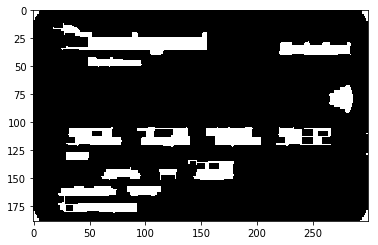

In [14]:
plt.imshow(cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR))

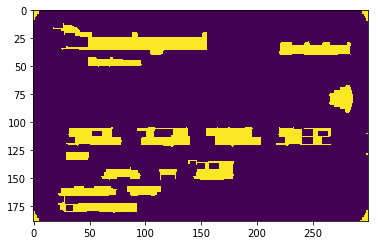

In [69]:
plt.imshow(thresh)

In [15]:
# find contours in the thresholded image, then initialize the
# list of digit locations
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
locs = []

In [16]:
for(i,c) in enumerate(cnts):
    (x,y,w,h) = cv2.boundingRect(c)
    ar = w/float(h)
    if ar > 2.5 and ar < 4.0:
        if (w > 40 and w < 55) and (h > 10 and h < 20):
            locs.append((x,y,w,h))

In [17]:
locs

[(218, 105, 49, 17), (155, 105, 49, 18), (93, 105, 48, 18), (30, 105, 50, 17)]

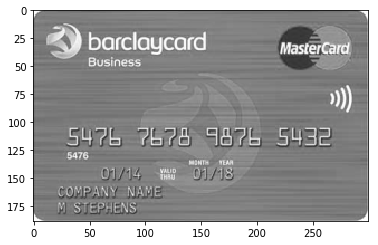

In [18]:
plt.imshow(gray)

In [20]:
gray = cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)

In [ ]:
output = []
for (i,(gX,gY,gW,gH)) in enumerate(locs):
#     print(i,gX,gY,gW,gH)
    groupOutput = []
    group = gray[gY - 5:gY + gH + 5, gX - 5:gX + gW + 5]
    group = cv2.threshold(group, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    digitCnts = cv2.findContours(group.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    digitCnts = digitCnts[0] if imutils.is_cv2() else digitCnts[1]
    digitCnts = contours.sort_contours(digitCnts,method="left-to-right")[0]
    for c in digitCnts:
        (x,y,w,h) = cv2.boundingRect(c)
        roi = group[y:y+h,x:x+h]
        roi = cv2.resize(roi,(57,88))
        
        scores = []
        for (digit,digitROI) in digits.items():
            result = cv2.matchTemplate(roi, digitROI,cv2.TM_CCOEFF)
            (_,score,_,_) = cv2.minMaxLoc(result)
            scores.append(score)
        groupOutput.append(str(np.argmax(scores)))
        cv2.rectangle(image, (gX - 5, gY - 5),(gX + gW + 5, gY + gH + 5), (0, 0, 255), 2)
        cv2.putText(image, "".join(groupOutput), (gX, gY - 15),cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 0, 255), 2)
        output.extend(groupOutput)

print("Credit Card #: {}".format("".join(output)))
cv2.imshow("Image", image)
cv2.waitKey(0)

In [48]:
result = np.array([[6365214.]])
(_,score,_,_) = cv2.minMaxLoc(result)

In [49]:
score

6365214.0

In [54]:
x = [3]
x.extend([1,2])
x

[3, 1, 2]

[1, 2]